In [31]:
import yfinance as yf
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from statsmodels.tsa.stattools import adfuller
from statsmodels.graphics.tsaplots import plot_acf

# from sklearn import metrics
# from sklearn.preprocessing import StandardScaler
# from scipy.stats import norm
# import statsmodels.api as sm
%matplotlib inline

### Get VTI history

In [2]:
vti = yf.Ticker("VTI")
vti_hist = vti.history(period="max")

#### Get top 10 holding in VTI


##### * Top 10 holdings were NOT found programatically. This info has yet to be found in the vti object *

In [3]:
microsoft = yf.Ticker('MSFT')
apple = yf.Ticker('AAPL')
amazon = yf.Ticker('AMZN')
facebook = yf.Ticker('FB')
alphabetA = yf.Ticker('GOOGL')
alphabetC = yf.Ticker('GOOG')
johnson = yf.Ticker('JNJ')
berkshire = yf.Ticker('BRK.B')
visa = yf.Ticker('V')
proctor = yf.Ticker('PG')

In [4]:
vti_holdings = [microsoft,apple,amazon,facebook,alphabetA,alphabetC,johnson,berkshire,visa,proctor]

#### Get DOW

In [6]:
dow = yf.Ticker('DJIA')

#### Visualy look for trends

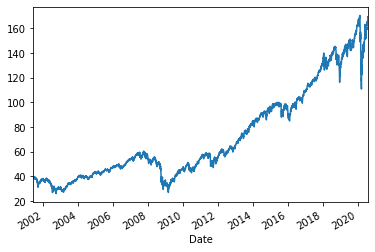

In [12]:
vti_hist.Close.plot()

#### test for stationarity

In [19]:
dfuller_results = adfuller(vti_hist.Close)

In [22]:
pd.Series(dfuller_results[0:4], index=['Test Statistic','p-value','#Lags Used','Number of Observations Used'])

Test Statistic                    1.170725
p-value                           0.995777
#Lags Used                       27.000000
Number of Observations Used    4789.000000
dtype: float64

In [25]:
vti_diff = vti_hist.diff()

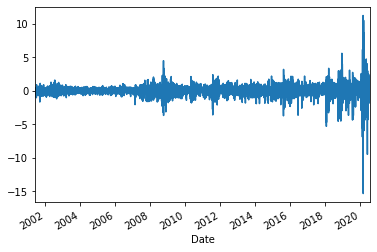

In [30]:
vti_diff.Close.plot()

In [28]:
dfuller_results = adfuller(vti_diff[1::].Close)

In [29]:
pd.Series(dfuller_results[0:4], index=['Test Statistic','p-value','#Lags Used','Number of Observations Used'])

Test Statistic                -1.440617e+01
p-value                        8.350659e-27
#Lags Used                     2.600000e+01
Number of Observations Used    4.789000e+03
dtype: float64

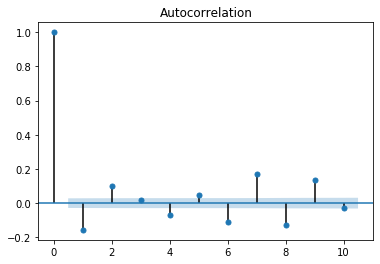

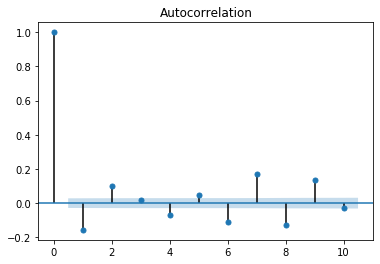

In [55]:
plot_acf(vti_diff.Close[1::], alpha=.05, lags=10)